In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

In [2]:
IMSIZE = 384

# Process data

In [3]:
data = np.fromfile("/home/philip/RemoteFNAL/PanLee_v8_00_00_13/OutTest/viewUVW.bin", dtype=np.float32)
dataPanReco = np.fromfile("/home/philip/RemoteFNAL/PanLee_v8_00_00_13/OutTest/PandoraRecoUVW.bin", dtype=np.float32)

In [4]:
fs = np.where(data==np.finfo(np.float32).max)[0] # Image seperator locations
ssPR = np.where(dataPanReco==-np.finfo(np.float32).max)[0]
print(np.shape(fs),np.shape(ssPR))

(1797,) (5391,)


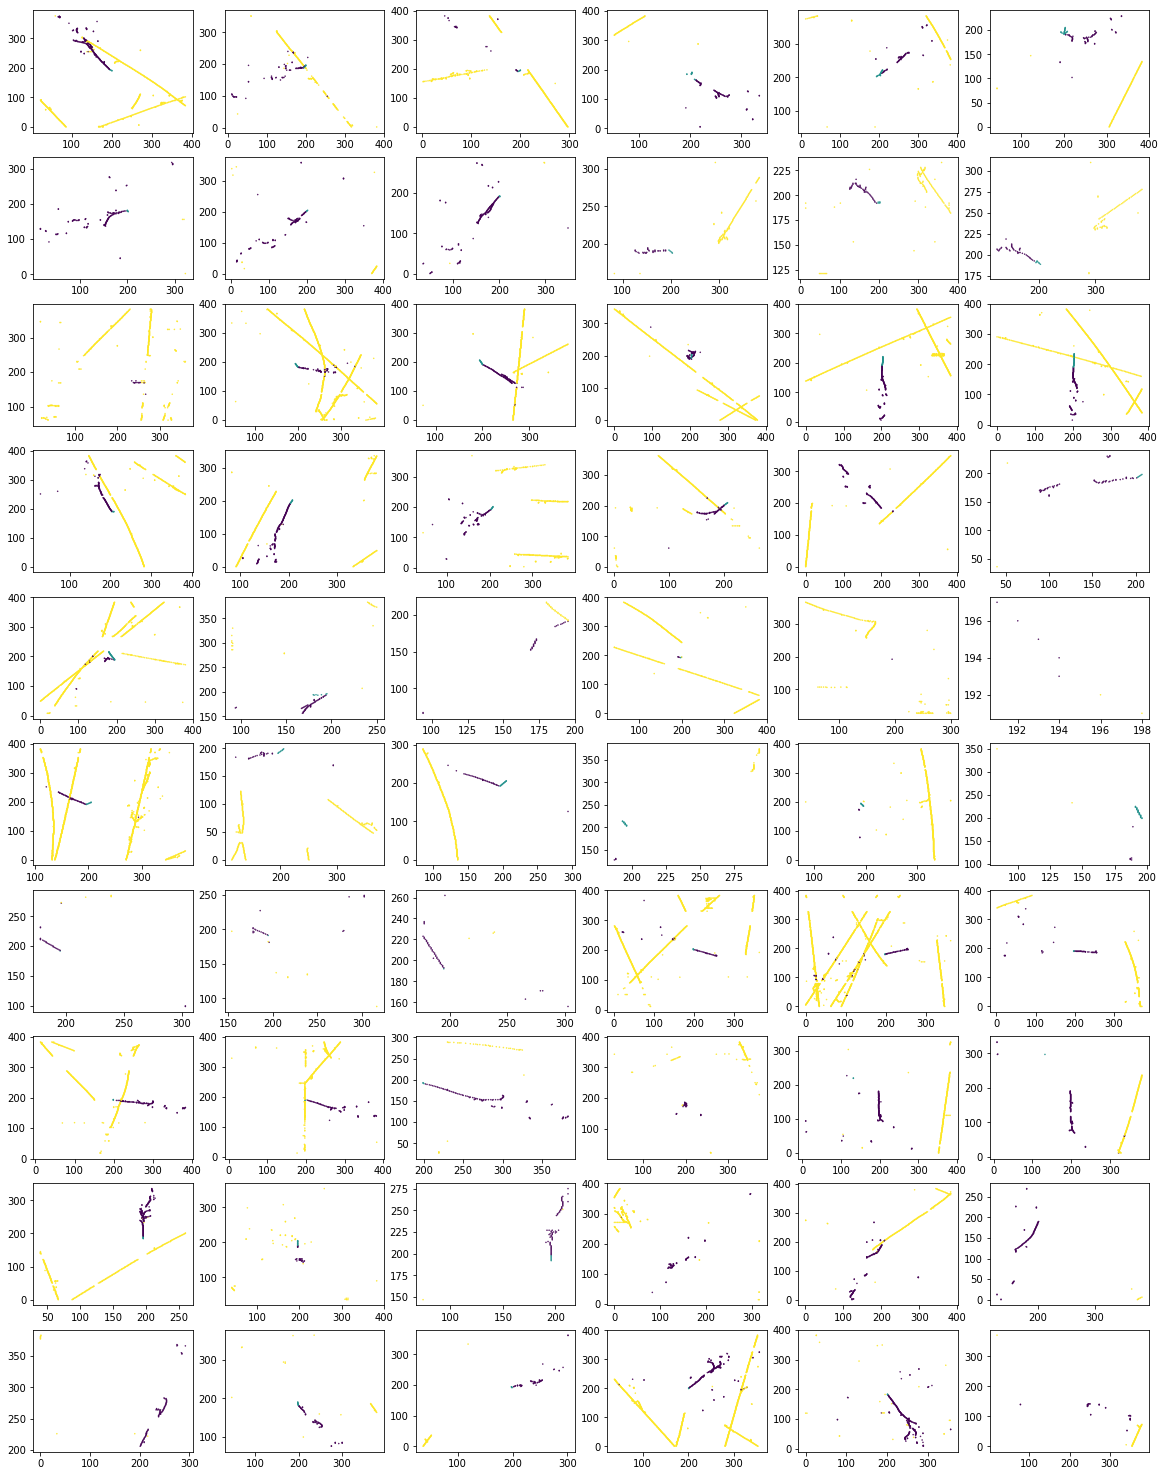

In [94]:
plt.figure(figsize=(20,40))
k=1
for m in range(20):
    for j in range(3):
        i = k*20+m 
        ss = np.where(data[fs[i]:fs[i+1]]==-np.finfo(np.float32).max)[0]
        ss = np.append(ss, fs[i+1]-fs[i])
        xMin = data[1+fs[i]+ss[j]]
        zMin = data[2+fs[i]+ss[j]]
        points = data[3+fs[i]+ss[j]:fs[i]+ss[j+1]].reshape((-1,6))
        x = ((points[:,0]-xMin)/0.3).astype(int)
        z = ((points[:,1]-zMin)/0.3).astype(int)
        Esto = points[:,2:]

        ax = plt.subplot(15,6,3*m+j+1)
        plt.scatter(x, z, c=np.argmax(Esto[:,1:], axis=1), s=1, marker=".")
    
plt.show()

In [116]:
i = 1 # Event numbe5
j = 0 # Wire plane U, V, W
# ss is the position of the seperator floats (maximum float value) divinding the hits
# between ss[0]+1 and ss[1] are all the U-View hits; between ss[1]+1 and ss[2] are V-view hits ... 
ss = np.where(data[fs[i]:fs[i+1]]==-np.finfo(np.float32).max)[0]
ss = np.append(ss, fs[i+1]-fs[i])
# The following extracts the gap information from the binary file
# fs[i] is the posion of the seperator float (negative maximum float value)
# fs[i]+1 is where the position of the first gap data
# For the three views there are 3*IMSIZE 32bit float values
# fs[i] is the point in the binary file where the seperator
gaps = data[fs[i]+j*IMSIZE+1:fs[i]+(j+1)*IMSIZE+1] 
print(np.shape(gaps))
gaps = np.repeat(gaps, IMSIZE, axis=0).reshape((IMSIZE, IMSIZE))
print(np.shape(gaps))
print("This has to be four: ", np.shape(ss))

print(fs[i], fs[i+1], ss[0], ss[1], ss[2], ss[3])
xMin = data[1+fs[i]+ss[j]]
zMin = data[2+fs[i]+ss[j]]
points = data[3+fs[i]+ss[j]:fs[i]+ss[j+1]].reshape((-1,6))

x = ((points[:,0]-xMin)/0.3).astype(int)
z = ((points[:,1]-zMin)/0.3).astype(int)
Esto = points[:,2:]

frame = np.zeros((IMSIZE, IMSIZE, 4))
for x1, z1, Esto1 in zip(x, z, Esto):
    frame[z1,x1]=Esto1

(384,)
(384, 384)
This has to be four:  (4,)
6952 14240 1153 2536 6007 7288


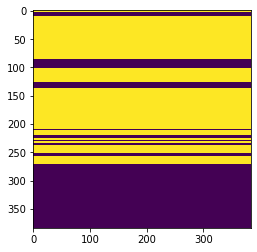

In [117]:
plt.imshow(gaps)
plt.show()

In [114]:
#print(frame[frame[:,:,0]!=0])

(384, 384)
(384, 384)


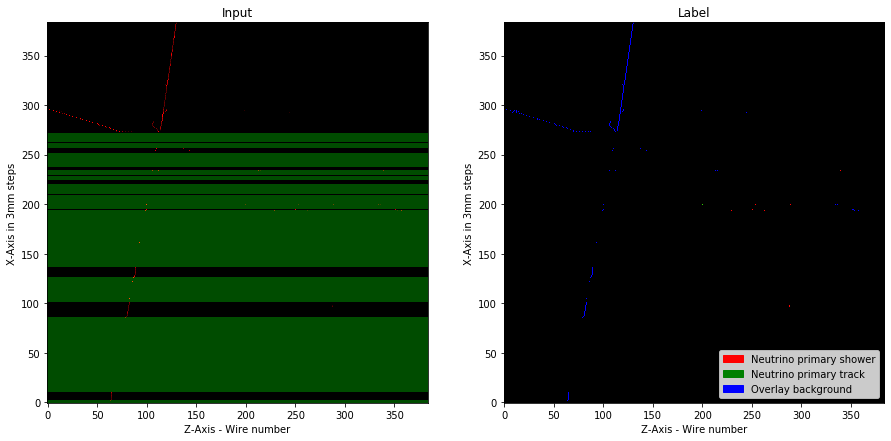

In [118]:
frame[frame<0.0]=0.0
frame[frame>1.0]=1.0
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.title("Input")

a = 1500*frame[:,:,0]
a[a>1.0]=1.0;
masked_frame = np.ma.masked_where(a == 0.0, a)
cmap = matplotlib.cm.viridis  # Can be any colormap that you want after the cm
cmap.set_bad(color='white')
zeros = np.zeros((IMSIZE, IMSIZE))
print(np.shape(masked_frame))
print(np.shape(gaps))
image = np.dstack((masked_frame, gaps*0.3, zeros))
plt.imshow(image, cmap=cmap)
plt.xlabel("Z-Axis - Wire number")
plt.ylabel("X-Axis in 3mm steps")
plt.gca().invert_yaxis()
#plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Label")
plt.imshow(frame[:,:,1:], cmap=cmap)
red_patch = mpatches.Patch(color='red', label='Neutrino primary shower')
green_patch = mpatches.Patch(color='green', label='Neutrino primary track')
blue_patch = mpatches.Patch(color='blue', label='Overlay background')
plt.legend(handles=[red_patch, green_patch, blue_patch], loc = 'lower right')
plt.xlabel("Z-Axis - Wire number")
plt.ylabel("X-Axis in 3mm steps")
plt.gca().invert_yaxis()
#plt.savefig('LEE_low_1_0.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

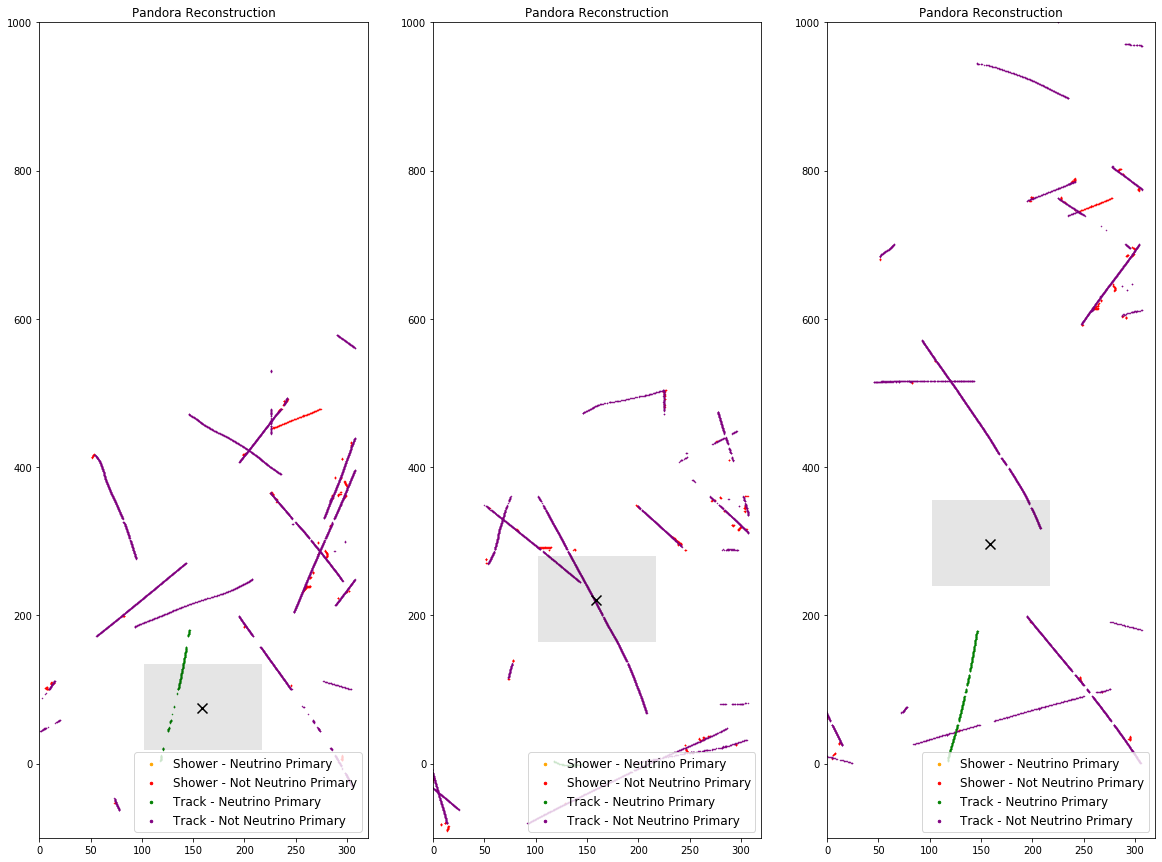

In [86]:
#i=3
m = 3*i

plt.figure(figsize=(20, 15))
for k in range(m, m+3):
    xMin = data[1+fs[i]+ss[k-m]]
    zMin = data[2+fs[i]+ss[k-m]]
    vertexX = dataPanReco[1+ssPR[k]]
    vertexZ = dataPanReco[2+ssPR[k]]

    xPR = dataPanReco[3+ssPR[k]:ssPR[k+1]:6]
    zPR = dataPanReco[4+ssPR[k]:ssPR[k+1]:6]
    snPR = dataPanReco[5+ssPR[k]:ssPR[k+1]:6] # Reconstructed as shower, neutrino final state
    soPR = dataPanReco[6+ssPR[k]:ssPR[k+1]:6] # Reconstructed as shower, not identified as neutrino final state
    tnPR = dataPanReco[7+ssPR[k]:ssPR[k+1]:6] # Reconstructed as track, neutrino final state
    toPR = dataPanReco[8+ssPR[k]:ssPR[k+1]:6] # Reconstructed as track, not identified as neutrino final state

    #plt.figure(figsize=(8,16))
    ax = plt.subplot(1,3,k-m+1)
    ax.scatter(xPR[snPR>0], zPR[snPR>0], c="orange", s=1, marker=".", label='Shower - Neutrino Primary')
    ax.scatter(xPR[soPR>0], zPR[soPR>0], c="red", s=1, marker=".", label='Shower - Not Neutrino Primary')
    ax.scatter(xPR[tnPR>0], zPR[tnPR>0], c="green", s=1, marker=".", label='Track - Neutrino Primary')
    ax.scatter(xPR[toPR>0], zPR[toPR>0], c="purple", s=1, marker=".", label='Track - Not Neutrino Primary')
    ax.scatter(vertexX,vertexZ, s=100, c='black', marker='x')
    rect = plt.Rectangle((xMin+1,zMin+1),IMSIZE*0.3,IMSIZE*0.3, facecolor="black", alpha=0.1)
    ax.add_patch(rect)
    ax.set_title("Pandora Reconstruction")
    ax.set_xlim([0,320])
    ax.set_ylim([-100,1000])
    plt.legend(loc='lower right', fontsize='large', markerscale=5);
    #plt.colorbar()
    #plt.savefig('Cropping6.png')
plt.show()

In [61]:
def u_resnet(output_channels, depth):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44)')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)
    
    inputs = tf.keras.layers.Input(shape=[IMSIZE, IMSIZE, 1])
    x = resnet_layer(inputs=inputs)
    
    skips = [None]*5
    
    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    skips = reversed(skips[:-1])
    skips = []

    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    
    
    
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])
        print(x)

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [38]:
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module, output_channels, depth):
    def __init__(self):
        super(UNet, self).__init__()
        self.output_channels = output_channels
        self.
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))


def u_resnet(output_channels, depth):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44)')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)
    
    inputs = tf.keras.layers.Input(shape=[IMSIZE, IMSIZE, 1])
    x = resnet_layer(inputs=inputs)
    
    skips = [None]*5
    
    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    skips = reversed(skips[:-1])
    skips = []

    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    
    
    
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])
        print(x)

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)
    return model

SyntaxError: invalid syntax (<ipython-input-38-695b78fa491a>, line 8)